In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [70]:
# Load the data matrix
A = np.loadtxt('mysterious_data.txt')
n,d = A.shape
print(f'The matrix A contains {n} points in dimension {d}')

The matrix A contains 3000 points in dimension 1000


(3000, 1000)

Each row of $A$ corresponds to a datapoint.

In [46]:
### CENTER YOUR DATA ###
mean_row = A.mean(axis=0)
A_centered = A - mean_row

In [50]:
### COMPUTE COVARIANCE ###
S = A.transpose() @ A

In [96]:
### COMPUTE EIGEN DECOMP ###
from numpy import linalg as LA
w, v = LA.eigh(S)
## w is eigenvalues
## v is eigenvectors

1243909.9724750144

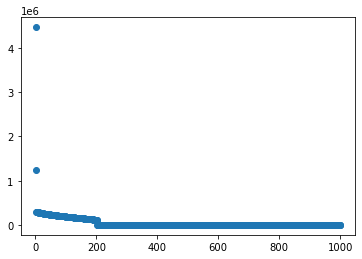

In [67]:
### FIND BEST K ### 
import matplotlib.pyplot as plt
x_axis = np.arange(1,1001)

plt.scatter(x_axis, np.flip(w))

## Using method 2 from the notes, we choose k = 2

In [120]:
### COMPUTE REDUCED VALUES #### 

v1 = v[:,-1]
## We scale our second eigenvector in order to get the plot we want in the end
## This is still valid for PCA because we are simply scaling our eigenvector, which maintains the properties of an eigenvector
v2 = v[:,-2] * -1

eigenvectors = [v1,v2]

reduced_A = np.zeros((3000, 2))

i = 0
for i in range(0,3000):
    for j in range(0,2):
        reduced_A[i][j] = np.dot(eigenvectors[j], A_centered[i,:])

In [125]:
v2

array([-3.25936806e-02,  4.20776865e-02, -2.07254294e-02, -1.84501885e-03,
       -2.12921767e-02, -3.29515036e-02, -8.91385549e-03, -4.94450169e-02,
        3.03130564e-02,  7.39690013e-02, -8.09951970e-03,  2.64081389e-02,
        3.86166072e-02, -1.31943852e-02,  1.09700195e-03,  4.64866740e-02,
       -5.21947899e-03,  5.41284479e-02, -7.74313710e-03,  1.39250711e-02,
       -1.98206837e-02,  2.09987624e-02,  1.95476148e-02, -7.55244492e-02,
        2.22664386e-03, -2.62423502e-02,  5.06972674e-02, -1.94876396e-02,
       -1.40321174e-02, -2.03196116e-03, -4.86710293e-02,  1.60793344e-02,
       -6.68418938e-02,  2.28555564e-02,  2.50177806e-02, -1.01377355e-02,
       -1.55101337e-02, -6.93713726e-03, -1.42572943e-02, -1.52588983e-02,
       -5.30430737e-02, -2.06128454e-02, -4.54305115e-02, -3.63702045e-02,
       -7.29912195e-02, -2.26577320e-02, -2.03001006e-02,  2.50241908e-02,
        2.53270282e-02,  1.78885438e-02, -2.66672795e-02, -1.03031790e-02,
       -2.53905011e-02,  

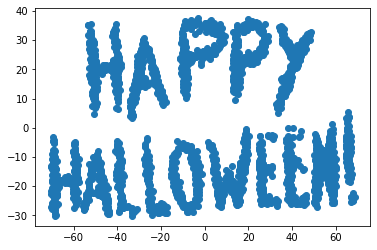

In [121]:
### PLOT RESULT ###
x, y = reduced_A.T
plt.scatter(x,y)